# Práctica 2: Aprendizaje automático

__Fecha de entrega: 27 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 30__

__Nombres de los estudiantes: Jorge Ortega y Daniela Vidal__

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.

Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.

Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IA2/p2/lower_back_pain_dataset2.csv')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [ ]:
X_train = df.loc[:, df.columns != 'Class_att']
Y_train = df.loc[:, df.columns == 'Class_att']

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

#### 2.1) Se comprueba si las clases están equilibradas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Número de ejemplos en cada clase
df['Class_att'].value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

In [ ]:
df['Class_att'].value_counts() / df['Class_att'].count() * 100

Abnormal    67.741935
Normal      32.258065
Name: Class_att, dtype: float64

Se puede ver que no están balanceadas. Hay 2/3 que son "Abnormal" y 1/3 que es "Normal" aproximadamente. Este desequilibrio puede afectar a la tasa de aciertos. Por ello se tendrán en cuenta otras medidas como la cantidad de falsos positivos y viceversa.

#### 2.2) Normalización de los datos

Vamos a escalar los datos ya que, como se puede observar, están en rangos muy distintos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalizamos los datos escalándolos al intervalo [0,1]
scaler = MinMaxScaler()
scaler.fit(X_train)
df_aux = scaler.transform(X_train) # Lo almacenamos en el dataset original
df_scaled = pd.DataFrame(data=df_aux, columns=df.columns[:-1])
df_scaled['Class_att'] = df['Class_att'].replace({'Abnormal': 0, 'Normal': 1}) #cambiamos a un valor numérico para poder calcular la correlación

#### 2.3) Correlación de las variables con `Class_att`

In [ ]:
# Calculamos la correlación con las variables
corr_matrix = df_scaled.corr()

# Ordenamos los valores de correlación por la columna de "Class_att"
corr_with_target = corr_matrix['Class_att'].sort_values(ascending=False)

# Imprimir los valores de correlación
print(corr_with_target)

Class_att                   1.000000
pelvic_radius               0.309857
scoliosis_slope             0.069315
thoracic_slope              0.049354
Direct_tilt                 0.039591
sacrum_angle               -0.026887
pelvic_slope               -0.055865
cervical_tilt              -0.100044
sacral_slope               -0.210602
lumbar_lordosis_angle      -0.312484
pelvic_tilt                -0.326063
pelvic_incidence           -0.353336
degree_spondylolisthesis   -0.443687
Name: Class_att, dtype: float64


Se puede como la clase pelvic_radius tiene una cierta relación directa con Class_att, es decir según esta variable aumenta es más probable que pertenezca a normal. En cambio se puede ver como variables como lumbar_lordosis_angle, pelvic_tilt o pelvic_incidence están inversamente relacionadas con Class_att, por tanto, a medida que estas variables aumentan, es menos probable que pertenezcan a normal y más probable que pertenezcan a anormal.                  

#### 2.4) Rangos y distribuciones de las variables numéricas

In [ ]:
df_scaled[['pelvic_radius', 'degree_spondylolisthesis', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle']].describe()

,pelvic_radius,degree_spondylolisthesis,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle
count,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.514452,0.086952,0.331276,0.430419,0.339450
std,0.143215,0.087428,0.166237,0.178762,0.166043
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.436900,0.029474,0.195613,0.307608,0.205831
50%,0.518189,0.053133,0.313862,0.409251,0.318253
75%,0.595613,0.121847,0.450685,0.512180,0.438509
max,1.000000,1.000000,1.000000,1.000000,1.000000


Abajo se pueden ver las medias y los rangos de las variables (sin normalizar) en contraste con las de arriba (normalizadas). 

Contiene 310 observaciones de 12 características relacionados con la columna vertebral. 
Podemos ver que las características tienen diferentes escalas y rangos, ya que los valores medios varían entre valores de 17 a 120. También podemos ver que la columna 'degree_spondylolisthesis' tiene un rango mucho mayor que las demás características, con un valor máximo de 418.5, mientras que el resto de las características tienen valores máximos de alrededor de 160 o menos.

Por tanto nosotros hemos decidido escalar los datos como se puede ver en la tabla de arriba. Al normalizar las variables, es posible compararlas más fácilmente, ya que las unidades originales y las escalas de las variables ya no importan. Podemos observar que las medias de algunas de las variables normalizadas son cercanas a 0.5, podemos deducir que la distribución de los datos puede ser algo balanceada, lo cual concuerda con lo que sabemos de la distribución 2/3 y 1/3.

In [ ]:
df[['pelvic_radius', 'degree_spondylolisthesis', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle']].describe()

,pelvic_radius,degree_spondylolisthesis,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle
count,310.000000,310.000000,310.000000,310.000000,310.000000
mean,117.920655,26.296694,60.496653,17.542822,51.930930
std,13.317377,37.559027,17.236520,10.008330,18.554064
min,70.082575,-11.058179,26.147921,-6.554948,14.000000
25%,110.709196,1.603727,46.430294,10.667069,37.000000
50%,118.268178,11.767934,58.691038,16.357689,49.562398
75%,125.467674,41.287352,72.877696,22.120395,63.000000
max,163.071041,418.543082,129.834041,49.431864,125.742385


#### 2.5) Diagramas de dispersión con las variables más relacionadas con `Class_att`

array([[<Axes: xlabel='pelvic_radius', ylabel='pelvic_radius'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_radius'>,
        <Axes: xlabel='pelvic_incidence', ylabel='pelvic_radius'>,
        <Axes: xlabel='pelvic_tilt', ylabel='pelvic_radius'>],
       [<Axes: xlabel='pelvic_radius', ylabel='degree_spondylolisthesis'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='degree_spondylolisthesis'>,
        <Axes: xlabel='pelvic_incidence', ylabel='degree_spondylolisthesis'>,
        <Axes: xlabel='pelvic_tilt', ylabel='degree_spondylolisthesis'>],
       [<Axes: xlabel='pelvic_radius', ylabel='pelvic_incidence'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_incidence', ylabel='pelvic_incidence'>,
        <Axes: xlabel='pelvic_tilt', ylabel='pelvic_incidence'>],
       [<Axes: xlabel='pelvic_radius', ylabel='pelvic_tilt'>,
        <Axes: xlabel='degree_spondylolisthesis', ylabel='pelvic_tilt'>,
  

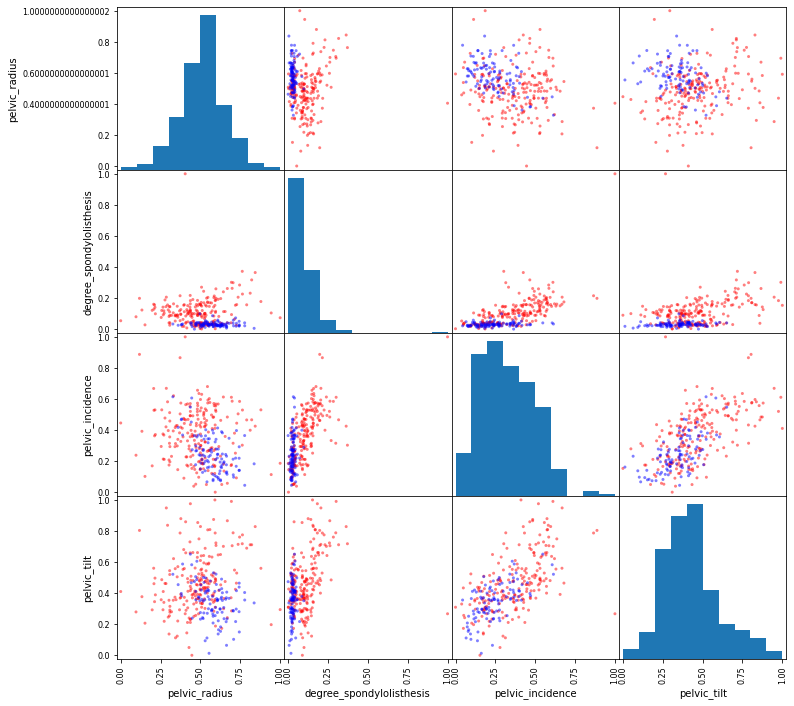

In [ ]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = { 0: 'red', 1: 'blue'}
colors = df_scaled['Class_att'].map(dic_colors)

scatter_matrix(df_scaled[['pelvic_radius', 'degree_spondylolisthesis', 'pelvic_incidence', 'pelvic_tilt']], figsize = (12, 12), diagonal = 'hist', color=colors)

En estos diagramas de dispersión se ve la relación de las variables 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_incidence', 'pelvic_tilt' (con mayor correlación con `Class_att`) entre ellas.

Empecemos con la relación entre el radio pélvico y espondilolistesis lumbar. Se observa una cierta tendencia a que según aumenta el radio pélvico aumenta el grado de espondilolistesis, sin embargo hay menos casos de lumbago, es decir, están más concentrados al principio.

En cambio la relación del radio pélvico con la incidencia pélvica y la inclinación pélvica nos muestra que a mayor radio pélvico y a menor incidencia pélvica y/o inclinación pélvica hay menos casos de lumbago.
En general la relación de la espondilolistesis con el resto de variables es más  menos parecida, a mayor espondilolistesis mayor probabilidad de tener lumbago.

Por último en la relación de la incidencia pélvica con la inclinación es que, en general, cuanto mayor es la incidencia pélvica, mayor es la tendencia a presentar un tilt pélvico. Se observa también que en general los casos anormales aumentan. 


## 3) Árboles de decisión

Aplica árboles de decisión para resolver el problema



### 3.1) Normalización de los datos

Como vamos a utilizar árboles de decisión, no reescalamos los datos.

In [ ]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

RANDOM_STATE=42

In [ ]:
# Crear una nueva variable con todas las columnas excepto la última
X = df.iloc[:, :-1]

# Crear una variable con la última columna
Y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=RANDOM_STATE)


In [ ]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 10)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, random_state=RANDOM_STATE)
    clf = clf.fit(X_train, y_train)

    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

train_accuracy, test_accuracy

([0.7695852534562212,
  0.847926267281106,
  0.8709677419354839,
  0.9032258064516129,
  0.9539170506912442,
  0.9861751152073732,
  1.0,
  1.0,
  1.0],
 [0.7956989247311828,
  0.7419354838709677,
  0.7741935483870968,
  0.7634408602150538,
  0.7849462365591398,
  0.8172043010752689,
  0.7956989247311828,
  0.7956989247311828,
  0.7956989247311828])

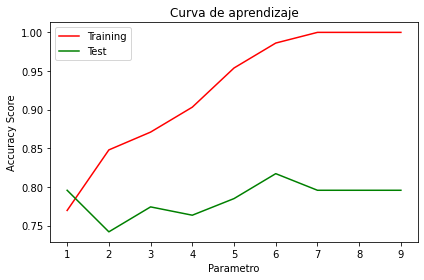

In [ ]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

In [ ]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 10)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, random_state=RANDOM_STATE)
    scores = cross_validate(clf, X, Y, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.778494623655914,
  0.8179211469534049,
  0.8616487455197133,
  0.9003584229390682,
  0.9225806451612903,
  0.9476702508960575,
  0.9634408602150538,
  0.9709677419354839,
  0.9802867383512546],
 [0.7709677419354839,
  0.6548387096774194,
  0.7451612903225806,
  0.7419354838709677,
  0.7709677419354839,
  0.7516129032258064,
  0.7516129032258064,
  0.732258064516129,
  0.7419354838709677])

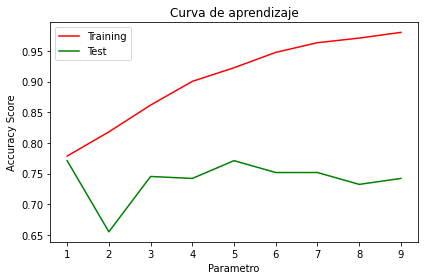

In [ ]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Se puede ver que las precisiones fluctúan entre 0.65 y 0.77. En este caso, parece que la máxima profundidad se alcanza en el valor 5, ya que a partir de ese punto, la precisión en los datos de test se estabiliza o disminuye, mientras que la precisión en los datos de entrenamiento sigue aumentando.

In [ ]:
MAX = 5

### 3.3) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=MAX, random_state=RANDOM_STATE)
clf = clf.fit(X, Y)

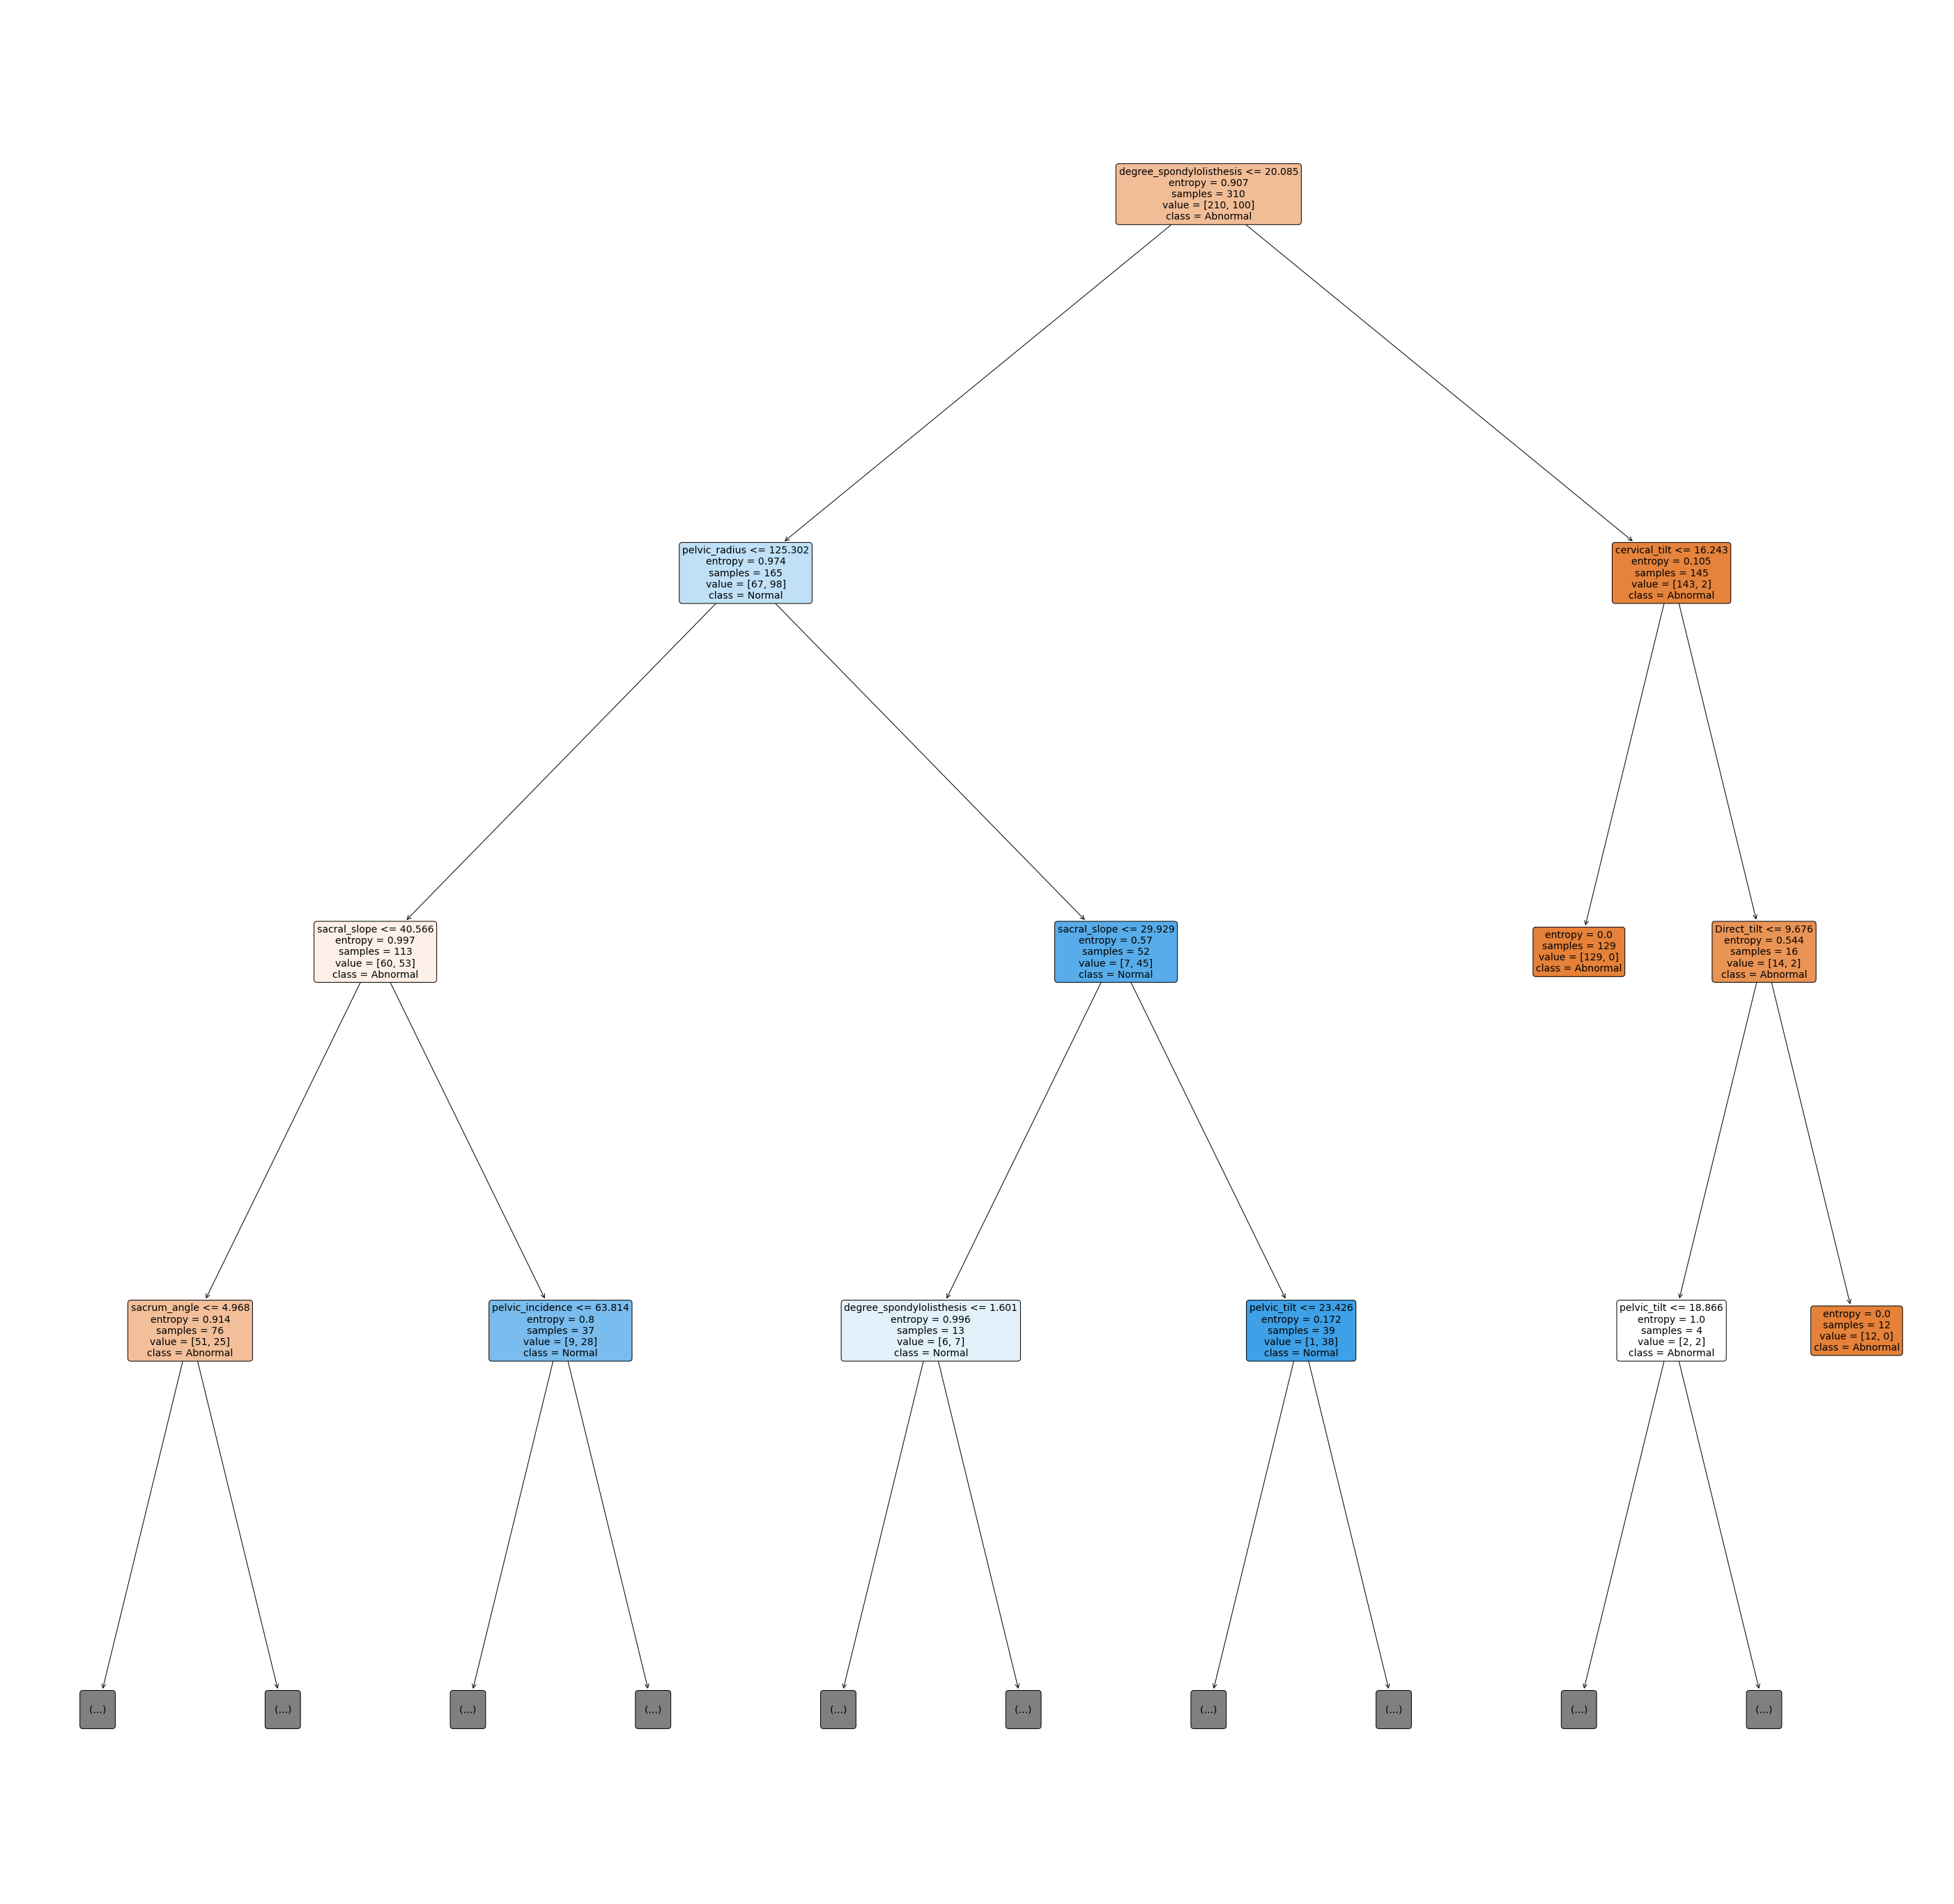

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(50,50))
plot_tree(clf, filled=True, max_depth = 3, feature_names=df.columns[:-1], class_names=df.iloc[:, -1].unique(), rounded=True)
plt.show()

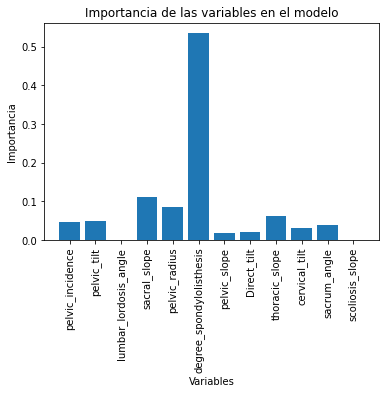

In [ ]:
# Obtener la importancia de las variables
importances = clf.feature_importances_

# Obtener los nombres de las variables
feature_names = df.columns[:-1]

# Pintar la importancia de las variables en una gráfica
plt.bar(feature_names, importances)
plt.title('Importancia de las variables en el modelo')
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.show()

1. ¿Cuáles son las variables más importantes y en qué orden?
  
  La variable más importante es 'degree_spondylolisthesis' como se puede ver en el gráfico ya que al estar arriba del todo indica que es la variable que mejor discrimina entre las clases de 'Normal' y 'Anormal'. A continuación las siguientes más importantes son 'Pelvic_radius' y 'Sacral_slope'.

2. ¿Hay variables del conjunto de datos que no se han usado?
  
  'Lumbar_lordosis_angle', 'Scoliosis_slope' de lo cual podemos deducir que estas características no son clave a la hora de decidir si la condición de la espalda es o no anormal.

3. ¿Cuál sería la tasa de aciertos (accuracy) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?
  
  La clase más frecuente es la de Anormal con 210 casos de 310. Con solo una pregunta habría:
  - Verdaderos Positivos = 143
  - Verdaderos Negativos = 98
  - Falsos Positivos = 2
  - Falsos Negativos = 98
  - Precisión: 77.74%





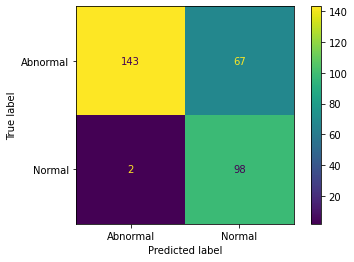

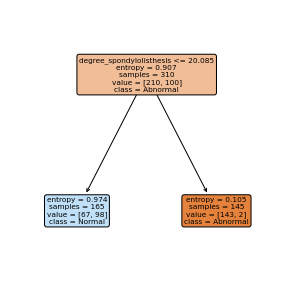

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

aux = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=RANDOM_STATE)
aux = aux.fit(X, Y)

aux.fit(X,Y)
predictions = aux.predict(X)
cm = confusion_matrix(Y, predictions, labels=aux.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Abnormal', 'Normal'])

disp.plot()
plt.show()

plt.figure(figsize=(5,5))
plot_tree(aux, filled=True, feature_names=df.columns[:-1], class_names=df.iloc[:, -1].unique(), rounded=True)
plt.show()

4. ¿El árbol que has calculado es capaz de separar las clases?
  
  Se puede observar que algunas de las hojas de este árbol no son puras, es decir, asigna la clase mayoritaria de las posibles. Esto se puede ver en la entropía de las hojas, que solo algunas de ellas alcanzan un 0.0.

5. Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
  
  Se puede ver que la variable de 'degree_spondylolisthesis' separa relativamente bien los anormales de los normales ya que, en general, si está por encima de 0.072 va a ser anormal. Si además la inclinación cervical está por debajo de 0.941 se sabe que será anormal (además tiene una entropía de 0.0). Lo mismo ocurre si se supera el umbral de 'direct_tilt'. En cambio si llegados a este punto no se ha podido clasificar todavía, será la respuesta a 'lumbar_lordosis_angle' la que los separará por completo.
  Por otro lado si 'degree_spondylolisthesis' es menor del umbral, no hay ninguna variable que consiga clasificarlo en muchos menos pasos que las otras.
  En general se separa mejor Anormal que Normal.

6. ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?
  El que más confusión presenta es 'Sacral_Slope' que de seis hojas, tres son clase Normal y por tanto, si lo clasifica como Anormal, erróneas.

### 3.4) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy:", np.sum(y_test == y_pred) / len(y_test))

Accuracy: 0.9247311827956989


##### Métricas detalladas por clase
Calculamos las métricas detalladas agregadas.

In [ ]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, X, Y, scoring=scoring_metrics, cv=10, return_train_score=True)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7743080837168457
Exhaustividad ponderada media:  0.7419354838709677
F1 ponderado media:  0.7299476960859714


Ahora calculamos las métricas detalladas por clase

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, X, Y, cv=10)

# Informe por clases
cr = classification_report(Y,predictions, target_names=df.iloc[:, -1].unique())
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.81      0.82      0.81       210
      Normal       0.61      0.59      0.60       100

    accuracy                           0.75       310
   macro avg       0.71      0.70      0.71       310
weighted avg       0.74      0.75      0.74       310



Se puede ver que no hay ninguna clase que se clasifique perfectamente, como se veía en el árbol, no obstante la clase de Anormal tiene una precisión y recall del 80%, en cambio la de normal de alrededor de un 60%. Es decir, el modelo tiene un mejor rendimiento en la detección de casos anormales que en la de normales. 
En general, como ya sabíamos, tiene una precisión del 75%, lo que significa que tiene un buen rendimiento, pero con margen de mejora. También podemos observar el modelo tiene una tendencia a clasificar más casos como "Abnormal" que como "Normal" 

Pintamos la matriz de confusión

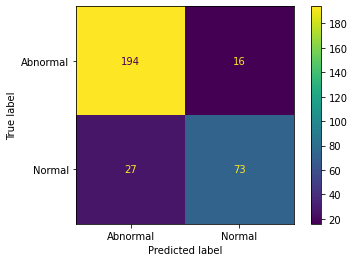

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf.fit(X,Y)
predictions = clf.predict(X)
cm = confusion_matrix(Y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Abnormal', 'Normal'])

disp.plot()
plt.show()

Se puede ver que, efectivamente, los que mejor se clasifican son los Anormales que 194 se clasifican correctamente mientras que 16 son falsos normales.
En cambio en la clase normales, rinde relativamente peor. 73 de ellos los clasifica correctamente, mientras que 27 los clasifica como anormales. 

#### Conclusiones
Este modelo funciona relativamente bien. Se podrá mejorar la predicción si se añaden más datos al conjunto de entrenamiento, por ejemplo. En general está claro que funciona bastante bien clasificando las clases anormales, no tanto con las normales. Por ello se puede usar un entorno en el que se priorice la detección de estos.

## 4) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

### 4.1) Normalización de los datos

El k-NN usa técnicas basadas en distancias por lo que debemos escalar los datos. Usaremos los que ya habíamos escalado en el 2.2

In [ ]:
df_scaled.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797,0
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812,0
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166,0
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741,0
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711,0


In [ ]:
# Crear una nueva variable con todas las columnas excepto la última
X = df_scaled.iloc[:, :-1]

# Crear una variable con la última columna
Y = df_scaled.iloc[:, -1]

### 4.2) Buscando el número óptimo de vecinos

Como ya hemos visto los datos están desequilibrados por lo que debemos hacer una partición estratificada que mantenga esa proporción en los dos conjuntos de datos.
Usaremos validación cruzada y la precisión de los datos de entrenamiento comparado con los de test para obtener el valor óptimo de k. No obstante, la validación cruzada será más precisa ya que por defecto usa estratificación.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=RANDOM_STATE)
train_accuracyKN = []
test_accuracyKN = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas 
max_depths = range(1, 10)
for md in max_depths: 
    clf = KNeighborsClassifier(n_neighbors=md, weights='distance')
    clf.fit(X_train, y_train)

    train_accuracyKN.append(clf.score(X_train, y_train))
    test_accuracyKN.append(clf.score(X_test, y_test))

train_accuracyKN, test_accuracyKN

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.6021505376344086,
  0.6021505376344086,
  0.5913978494623656,
  0.5806451612903226,
  0.6559139784946236,
  0.6989247311827957,
  0.6559139784946236,
  0.6774193548387096,
  0.6881720430107527])

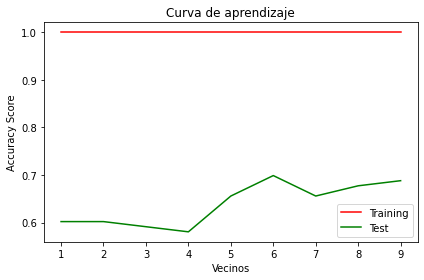

In [ ]:
# Draw lines
plt.plot(max_depths, train_accuracyKN, color="r",  label="Training")
plt.plot(max_depths, test_accuracyKN, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Vecinos"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show() 

In [ ]:
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, X, Y, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean

[0.5935483870967743,
 0.5935483870967743,
 0.6451612903225807,
 0.6258064516129033,
 0.6741935483870969,
 0.6645161290322582,
 0.6903225806451614,
 0.6967741935483872,
 0.7193548387096775,
 0.6903225806451613,
 0.6967741935483872,
 0.6935483870967742,
 0.7032258064516129,
 0.6967741935483872]

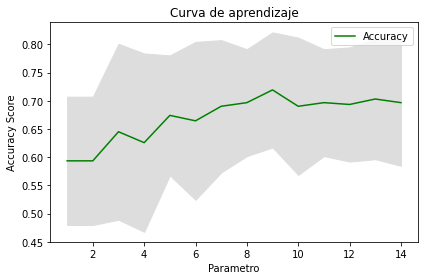

In [ ]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Se puede ver que las precisiones fluctúan entre 0.59 y 0.72. Los mejores son para k=8 y k=9 así que elegiremos k=9.

In [ ]:
k = 9

### 4.3) Algorimto k-NN con el valor óptimo del parámetro

In [ ]:
clf = KNeighborsClassifier(k, weights='distance')
scores = cross_validate(clf, X, Y, scoring='accuracy', cv=10)

accuracy_mean = np.mean(scores['test_score'])
accuracy_std = np.std(scores['test_score'])
print('Accuracy mean: ', accuracy_mean)
print('Accuracy std: ',accuracy_std)

Accuracy mean:  0.7193548387096775
Accuracy std:  0.10205994851326694


In [ ]:
clf.fit(X_train,y_train)
predict = clf.predict(X_test)
print('Precisión separando en datos de entrenamiento y test: ', np.sum(predict == y_test)/len(y_test))

Precisión separando en datos de entrenamiento y test:  0.6881720430107527


### 4.4) Estudiando el error

Calculamos los valores de precisión, exahustividad y la medida F1 para cada una de las clases, además de los valores agregados.

In [ ]:
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

clf = KNeighborsClassifier(k, weights='distance')

scores = cross_validate(clf, X, Y, scoring=scoring_metrics, cv=10, return_train_score=False)

print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7329160975839055
Exhaustividad ponderada media:  0.7193548387096775
F1 ponderado media:  0.7109142620926587


Se puede ver que el modelo predice correctamente en promedio el 73% de los casos. La exhaustividad nos indica que en promedio el modelo detecta el 71% de los casos positivos, es decir, los casos en los que el paciente tiene una condición anormal de la columna vertebral. El valor de F1 nos indica el equilibrio entre la precisión y el recall, en este caso es del 71%, por tanto es adecuado pero podría ser mejor.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = KNeighborsClassifier(k, weights='distance')
predictions = cross_val_predict(clf, X,Y, cv=10)

# Informe por clases
cr = classification_report(Y, predictions, target_names=df.iloc[:, -1].unique())
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.78      0.82      0.80       210
      Normal       0.57      0.50      0.53       100

    accuracy                           0.72       310
   macro avg       0.68      0.66      0.67       310
weighted avg       0.71      0.72      0.71       310



Se puede ver que no hay ninguna clase que se clasifique perfectamente. La clase de Anormal tiene una precisión y recall de alrededor del 80%, en cambio la precisión de normal es 57% y su recall de 50%. Es decir, el modelo tiene un mejor rendimiento en la detección de casos anormales que en la de normales. En general tiene una precisión del 72%, lo que significa que tiene un buen rendimiento, pero con margen de mejora. También podemos observar el modelo tiene una tendencia a clasificar más casos como "Abnormal" que como "Normal"

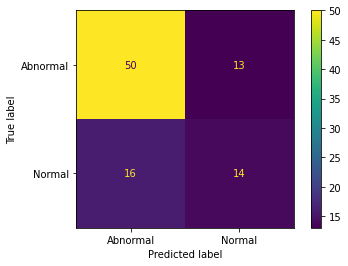

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Abnormal', 'Normal'])

disp.plot()
plt.show()

Se puede ver, como habíamos visto en las métricas, que predice mucho mejor los casos anormales que los normales. La mayoría de anormales son verdaderos anormales mientras que la mayoría de los normales los clasifica como anormales. Es decir, tiene un buen rendimiento en el caso de la clase 'Abnormal' pero un rendimiento bastante mejorable en la clase 'Normal'.

## 5) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

### 5.1) Normalización de los datos
El MLP usa regresión de variables por lo que debemos escalar los datos. Usaremos los que ya habíamos escalado en el 2.2

In [ ]:
df_scaled.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148,0.744554,0.186396,0.610506,0.845115,0.156861,0.977797,0
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365,0.413783,0.197208,0.854170,0.996300,0.230878,0.243812,0
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523,0.473750,0.666533,0.850409,0.983442,0.148026,0.327166,0
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838,0.367741,0.556360,0.461461,0.448790,0.113989,0.316741,0
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173,0.542524,0.957940,0.725757,0.188118,0.447450,0.479711,0


In [ ]:
X = df_scaled.iloc[:, :-1]
Y = df_scaled.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=RANDOM_STATE)

### 5.2) Buscando el mejor coeficiente de regularización usando validación cruzada

In [ ]:
accuracy_mean = []
accuracy_std = []

regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
        # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    scores = cross_validate(mlp, X, Y, scoring='accuracy', cv=10)

    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.7967741935483871,
 0.7967741935483871,
 0.7741935483870968,
 0.7612903225806452,
 0.7322580645161291,
 0.7161290322580645,
 0.703225806451613,
 0.7032258064516129,
 0.6967741935483871,
 0.703225806451613]

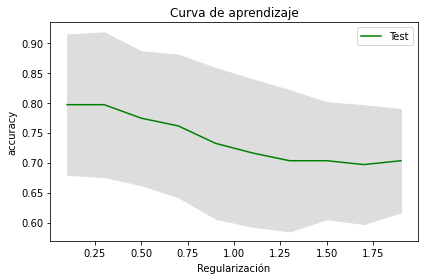

In [ ]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

El valor que permite una mayor precisión es α=0.3

In [ ]:
regul_param = 0.3

### 5.3) Usando el modelo con el parámetro óptimo

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
scores = cross_validate(mlp, X, Y, scoring='accuracy', cv=10)

accuracy_mean= np.mean(scores['test_score'])
accuracy_std = np.std(scores['test_score'])

In [ ]:
print('Accuracy mean: ', accuracy_mean)
print('Accuracy std: ',accuracy_std)

Accuracy mean:  0.7967741935483871
Accuracy std:  0.12074172433685743


Se consigue una precisión media del 79% con validación cruzada para alfa = 0.3. Lo cual concuerda con lo que hemos estado viendo hasta ahora con el resto de algoritmos. 

In [ ]:
mlp.fit(X_train,y_train)
predict = mlp.predict(X_test)
print('Precisión separando en datos de entrenamiento y test: ', np.sum(predict == y_test)/len(y_test))

Precisión separando en datos de entrenamiento y test:  0.7634408602150538


Se puede ver que al entrenar el modelo con los datos de entrenamiento y probándolo con los de tests, se obtiene una precisión del 76%, más o menos lo que esperábamos.

### 5.4) Estudiando el error

Calculamos los valores de precisión, exahustividad y la medida F1 para cada una de las clases, además de los valores agregados.

In [ ]:
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)

scores = cross_validate(clf, X, Y, scoring=scoring_metrics, cv=10, return_train_score=False)

print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8239892147746284
Exhaustividad ponderada media:  0.7967741935483871
F1 ponderado media:  0.7950397504666954


Se puede ver que el modelo predice correctamente en promedio el 82% de los casos. La exhaustividad nos indica que en promedio el modelo detecta el 79.6% de los casos positivos, es decir, los casos en los que el paciente tiene una condición anormal de la columna vertebral. El valor de F1 nos indica el equilibrio entre la precisión y el recall, en este caso es del 79%, por tanto es una buena relación.

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, X,Y, cv=10)

# Informe por clases
cr = classification_report(Y, predictions, target_names=df.iloc[:, -1].unique())
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.85      0.85      0.85       210
      Normal       0.68      0.69      0.69       100

    accuracy                           0.80       310
   macro avg       0.77      0.77      0.77       310
weighted avg       0.80      0.80      0.80       310



Se puede ver que no hay ninguna clase que se clasifique perfectamente. La clase de Anormal tiene una precisión y un recall del 85%, en cambio la precisión de normal es 68% y su recall de 69%. Es decir, el modelo tiene un rendimiento mejor en la detección de casos anormales que en la de normales. En general tiene una precisión del 80%, lo que significa que tiene un buen rendimiento. También podemos observar el modelo tiene una tendencia a clasificar más casos como "Abnormal" que como "Normal".

En general, se puede decir que el modelo es mejor para predecir la clase "Abnormal" que la clase "Normal". Además, la precisión, exhaustividad y valor F1 ponderados son del 80% los tres, lo que indica que el modelo tiene un rendimiento bastante bueno en general.

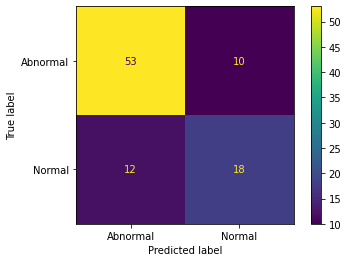

In [ ]:
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Abnormal', 'Normal'])

disp.plot()
plt.show()

Se puede ver, como habíamos visto en las métricas, que predice mucho mejor los casos anormales que los normales. La mayoría de casos anormales son correctos y lo mismo pasa con los normales, aunque los clasifica peor. Es decir, tiene un buen rendimiento en el caso de la clase 'Abnormal' pero un rendimiento mejorable en la clase 'Normal'.